In [11]:
import pandas as pd
pd.set_option('display.float_format',lambda x:'{:.2f}'.format(x))
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from scipy.stats import skew , norm
import warnings
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv("Boston.csv")
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98,24.00
1,2,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14,21.60
2,3,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03,34.70
3,4,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94,33.40
4,5,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33,36.20


In [14]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [17]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [24]:
for i in df.columns:
    print(i)
    print(df[i].value_counts().sort_values(ascending=False))

crim
0.02     2
14.33    2
0.10     1
0.79     1
0.35     1
        ..
0.04     1
4.87     1
0.05     1
0.02     1
0.26     1
Name: crim, Length: 504, dtype: int64
zn
0.00      372
20.00      21
80.00      15
12.50      10
25.00      10
22.00      10
40.00       7
30.00       6
45.00       6
90.00       5
60.00       4
33.00       4
21.00       4
95.00       4
28.00       3
52.50       3
75.00       3
34.00       3
35.00       3
70.00       3
55.00       3
82.50       2
85.00       2
17.50       1
100.00      1
18.00       1
Name: zn, dtype: int64
indus
18.10    132
19.58     30
8.14      22
6.20      18
21.89     15
        ... 
2.31       1
0.74       1
4.00       1
2.25       1
1.89       1
Name: indus, Length: 76, dtype: int64
chas
0    471
1     35
Name: chas, dtype: int64
nox
0.54    23
0.71    18
0.44    17
0.87    16
0.62    15
        ..
0.52     1
0.39     1
0.43     1
0.39     1
0.42     1
Name: nox, Length: 81, dtype: int64
rm
6.17    3
5.71    3
6.42    3
6.13    3
6.23   

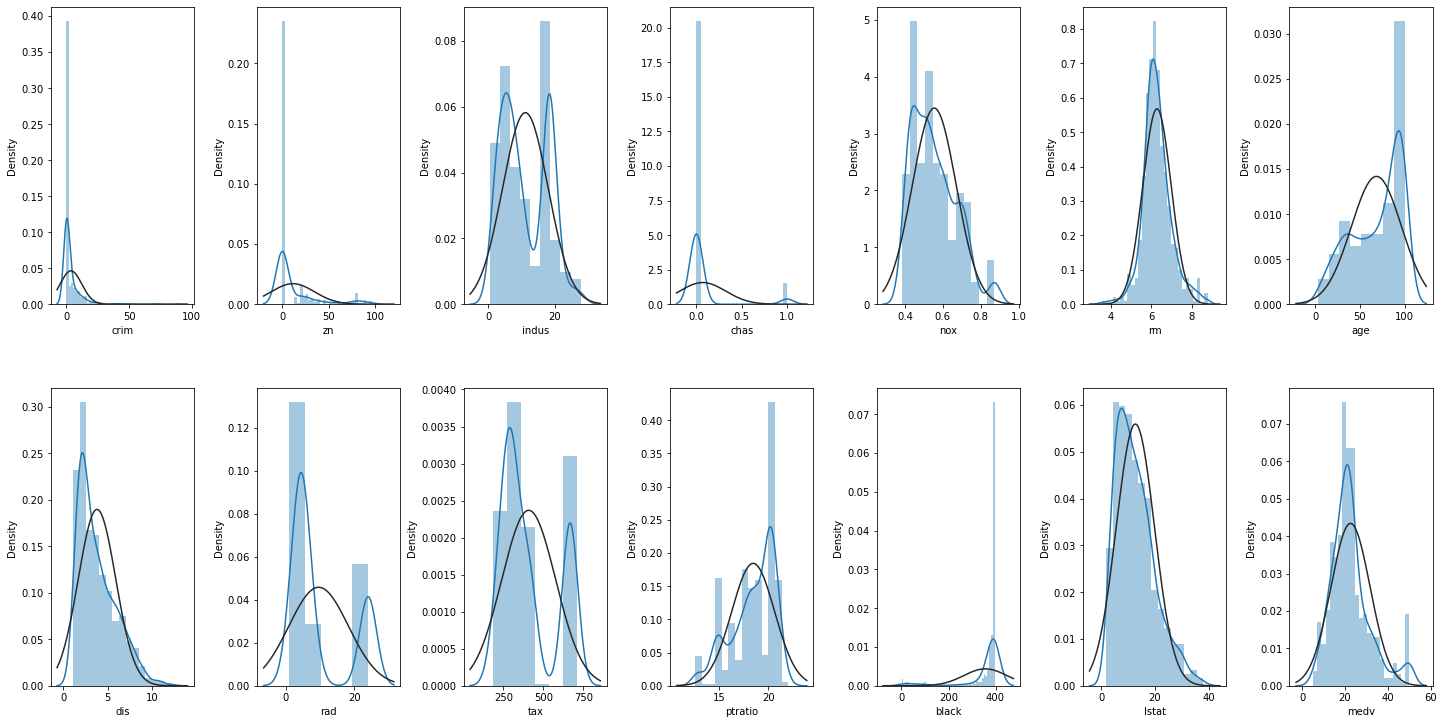

In [41]:
fig,ax=plt.subplots(ncols=7,nrows=2,figsize=(20,10))
ax=ax.flatten()
index=0
for col,value in df.items():
    sns.distplot(value,ax=ax[index],fit=norm)
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

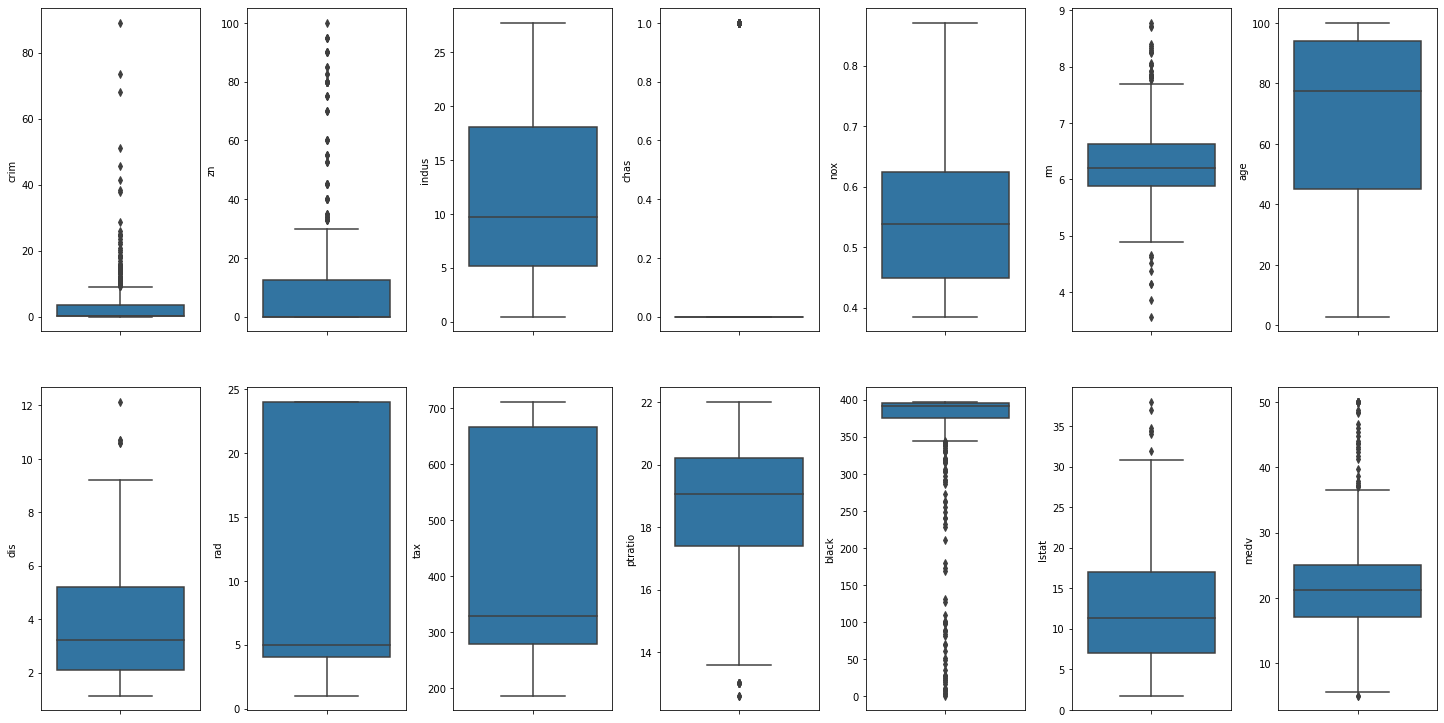

In [52]:
fig,ax=plt.subplots(nrows=2,ncols=7,figsize=(20,10))
ax=ax.flatten()
index=0
for col,value in df.items():
    sns.boxplot(y=col,data=df,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [53]:
cols = ['crim', 'zn', 'tax', 'black']
for col in cols:
    # find minimum and maximum of that column
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)

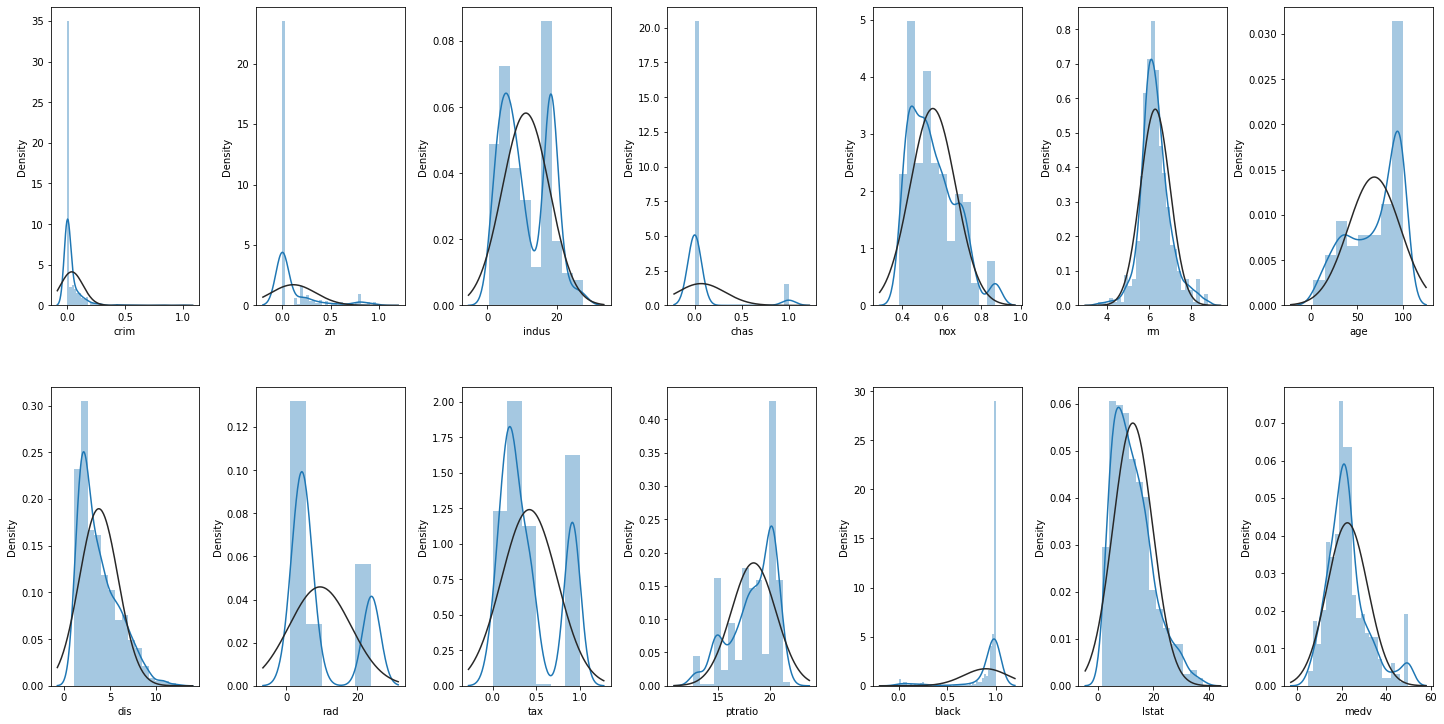

In [54]:
fig,ax=plt.subplots(ncols=7,nrows=2,figsize=(20,10))
ax=ax.flatten()
index=0
for col,value in df.items():
    sns.distplot(value,ax=ax[index],fit=norm)
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [55]:
from sklearn import preprocessing
scalar=preprocessing.StandardScaler()
scaled_cols=scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()


,crim,zn,tax,black
0,-0.42,0.28,-0.67,0.44
1,-0.42,-0.49,-0.99,0.44
2,-0.42,-0.49,-0.99,0.40
3,-0.42,-0.49,-1.11,0.42
4,-0.41,-0.49,-1.11,0.44


<AxesSubplot:>

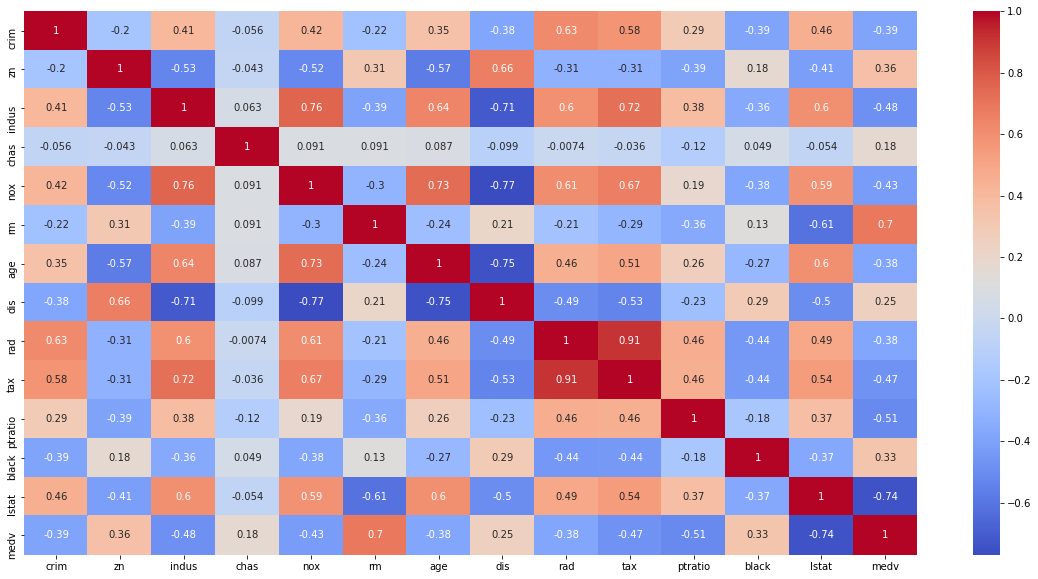

In [66]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

<AxesSubplot:xlabel='rm', ylabel='medv'>

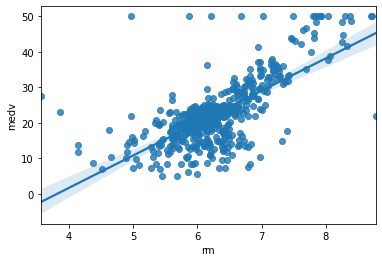

In [69]:
sns.regplot(df['rm'],df['medv'])

<AxesSubplot:xlabel='lstat', ylabel='medv'>

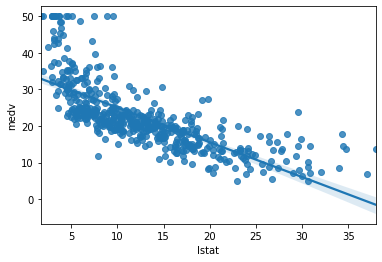

In [70]:
sns.regplot(df['lstat'],df['medv'])

In [89]:
X=df.drop(columns=['rad','medv'],axis=1)
y=df['medv']

In [96]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error
def train(model,X,y):
    x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    cv_score=cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)
    cv_score=np.abs(np.mean(cv_score))
    print("Model Report")
    print("MSE:",mean_squared_error(y_test,pred))
    print("CV Score:",cv_score)

Model Report
MSE: 23.871005067364898
CV Score: 35.58136621076921


<AxesSubplot:title={'center':'Model Coefficients'}>

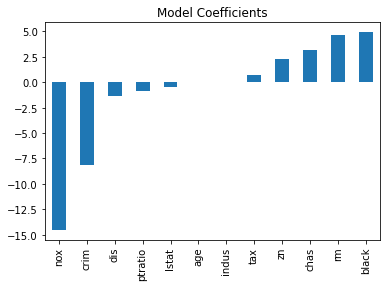

In [98]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(normalize=True)
train(model,X,y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Model Report
MSE: 10.331811023622048
CV Score: 40.95249039021549


<AxesSubplot:title={'center':'Feature Importance'}>

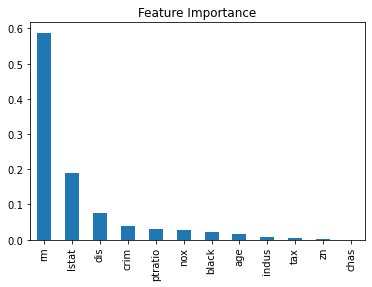

In [99]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

Model Report
MSE: 9.93975901574803
CV Score: 21.30523208514851


<AxesSubplot:title={'center':'Feature Importance'}>

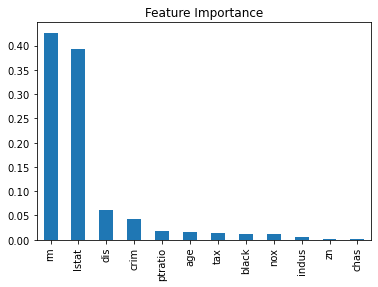

In [100]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

Model Report
MSE: 10.464839464566932
CV Score: 19.749967186274496


<AxesSubplot:title={'center':'Feature Importance'}>

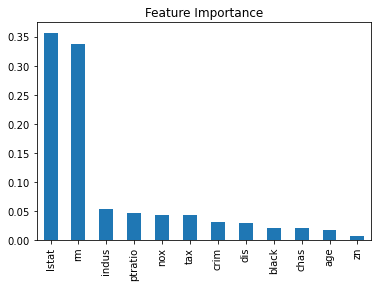

In [101]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')